
Modelagem, Simulação e Implementação de Sistemas
========

**Lista I** - Revisão de Transformada de Laplace
-------

Guilherme Brandão da Silva

***

<p style="page-break-after:always;"></p>

In [3]:
% Módulos para os Cálculos de Laplace e Operações Simbólicas
pkg load control
pkg load symbolic

% Variáveis Simbólicas
syms s t x(t)

% Function para Plotar a Inversa de Laplace (Simbólica)
function plot_ilap(f, l)
    p = ezplot(f);
    axis(l);
    set(p,'linewidth', 5, 'color', 'k');
end;

Symbolic pkg v2.7.0: Python communication link active, SymPy v1.2.


### **Exercício 1:** Ache as transformadas de Laplace inversa de: $$F(s) = \frac{(s+3)}{(s+1)(s+2)}$$

f = (sym)

     s + 3    
  ────────────
   2          
  s  + 3⋅s + 2

ans = (sym)

  ⎛   t    ⎞  -2⋅t
  ⎝2⋅ℯ  - 1⎠⋅ℯ    



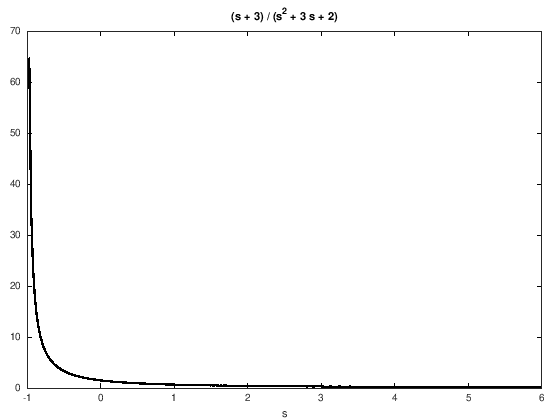

In [4]:
% Declaração da Função
f = (s+3)/(s^2+3*s+2)

% Cálculo da Inversa de Laplace
ilaplace(f)

% Plotando a Resposta da Função no Tempo
plot_ilap(f, [-1 6 0 70])

### **Exercício 2:** Ache as transformadas de Laplace inversa de: $$G(s) = \frac{(s^3+5s^2+9s+7)}{(s+1)(s+2)}$$

In [96]:
% Declaração da Função
num = [1 5 9 7];
den = conv([1 1], [1 2]);

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = 2/(s+1) - 1/(s+2) + 1*s + 2

% Cálculo da Inversa de Laplace
f = ilaplace(F, s)

% Plotando a Resposta da Função no Tempo
% plot_ilap(f, [0 6 0 0.4])

F = (sym)

            1       2  
  s + 2 - ───── + ─────
          s + 2   s + 1

f = (sym)

                                                       -s    -2⋅s
  InverseLaplaceTransform(s, s, s, None) + 2⋅δ(s) + 2⋅ℯ   - ℯ    



### **Exercício 3:** Obtenha as expanção em frações parciais e encontre a transformada inversa de Laplace de: $$\frac{B(s)}{A(s)} = \frac{2s^3 + 5s^2 + 3s + 6}{s^3 + 6s^2 + 11s + 6} $$

F = (sym)

        6       4       3  
  2 - ───── - ───── + ─────
      s + 3   s + 2   s + 1

f = (sym)

              -s      -2⋅s      -3⋅s
  2⋅δ(s) + 3⋅ℯ   - 4⋅ℯ     - 6⋅ℯ    



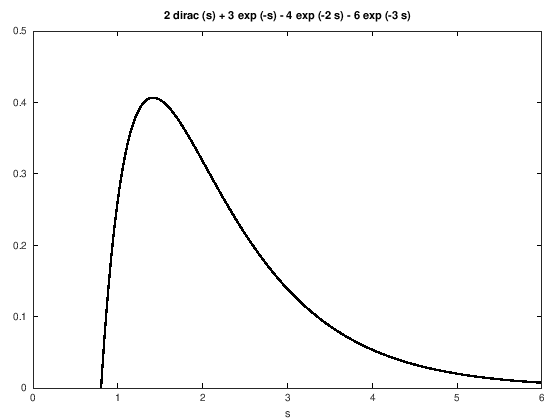

In [97]:
% Declaração da Função
num = [2 5 3 6];
den = [1 6 11 6];

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = 3/(s+1) + -4/(s+2) + -6/(s+3) + 2

% Cálculo da Inversa de Laplace
f = ilaplace(F, s)

% Plotando a Resposta da Função no Tempo
plot_ilap(f, [0 6 0 0.5])

### **Exercício 4:** Obtenha as expanção em frações parciais e encontre a transformada inversa de Laplace de: $$\frac{B(s)}{A(s)} = \frac{2s^2 + 2s + 3}{(s + 1)^3} $$

F = (sym)

    2        2          3    
  ───── - ──────── + ────────
  s + 1          2          3
          (s + 1)    (s + 1) 

f = (sym)

  ⎛   2          ⎞  -t
  ⎝3⋅t  - 4⋅t + 4⎠⋅ℯ  
  ────────────────────
           2          



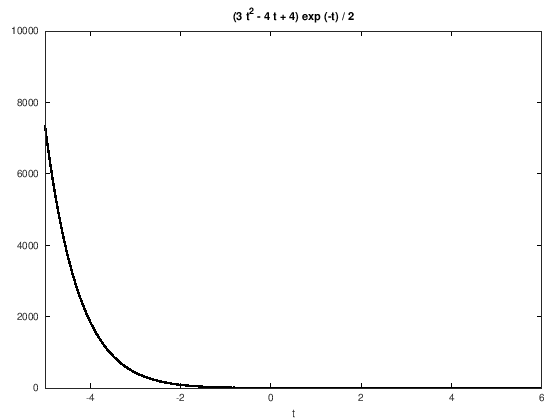

In [98]:
% Declaração da Função
num = [2 2 3];
den = conv(conv([1 1], [1 1]), [1 1]);

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = 2/(s+1) + -2/(s+1)^2 + 3/(s+1)^3

% Cálculo da Inversa de Laplace
f = ilaplace(F)

% Plotando a Resposta da Função no Tempo
plot_ilap(f, [-5 6 0 10000])

### **Exercício 5:** Obtenha as expanção em frações parciais e encontre a transformada inversa de Laplace de: $$F(s) = \frac{10 (s+2)(s+4)}{(s+1)(s+3)(s+5)^2} $$

F = (sym)

    2.1875     3.75      1.25   0.9375
  - ────── + ──────── + ───── + ──────
    s + 5           2   s + 3   s + 1 
             (s + 5)                  

error: Python exception: ValueError: gamma function pole
    occurred at line 2 of the Python code block:
    f = inverse_laplace_transform(F, s, t)
error: called from
    python_cmd at line 179 column 7
    ilaplace at line 156 column 5


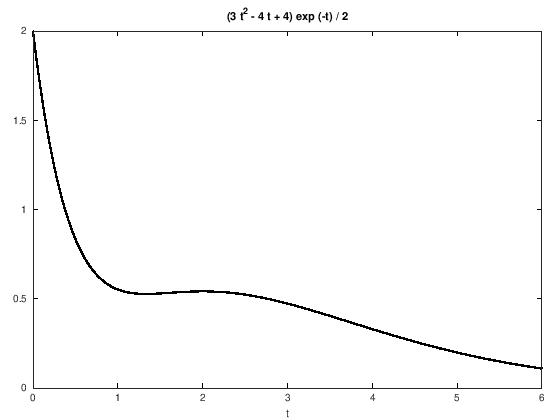

In [99]:
% Declaração da Função
num = conv(10, conv([1 2], [1 4]));
den = conv(conv(conv([1 1], [1 3]), [1 5]), [1 5]);

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
F = vpa(0.9375)/(s+1) + vpa(1.25)/(s+3) - vpa(2.1875)/(s+5) + vpa(3.75)/(s+5)^2

% Cálculo da Inversa de Laplace
f = ilaplace(F)

% Plotando a Resposta da Função no Tempo
plot_ilap(f, [0 6 0 2])

### **Exercício 6:** Resolva a equação diferencial: $$ \ddot{x} + 2\dot{x} + 5x = 3,$$ com as seguintes condições: $$\dot{x}(0) = 0, x(0) = 0$$

In [100]:
% Equanção Diferencial
eqn = diff(x,t, t)  + 2*diff(x, t) + 5*x == 3;

% Condições Iniciais
cond1 = diff(x)(0) == 0;
cond2 = x(0) == 0;

% Solução da Equação Diferencial
r = dsolve(eqn, cond1, cond2)

r = (sym)

         ⎛  3⋅sin(2⋅t)   3⋅cos(2⋅t)⎞  -t   3
  x(t) = ⎜- ────────── - ──────────⎟⋅ℯ   + ─
         ⎝      10           5     ⎠       5



### **Exercício 7:** Resolva a equação diferencial: $$ 2\ddot{x} + 7\dot{x} + 3x = 0,$$ com as seguintes condições: $$\dot{x}(0) = 0, x(0) = 3$$

In [101]:
% Equanção Diferencial
eqn = 2*diff(x,t, t) + 7*diff(x, t) + 3*x == 0;

% Condições Iniciais
cond1 = diff(x)(0) == 0;
cond2 = x(0) == 3;

% Solução da Equação Diferencial
r = dsolve(eqn, cond1, cond2)


r = (sym)

              -3⋅t            
           3⋅ℯ           18   
  x(t) = - ─────── + ─────────
              5           ____
                         ╱  t 
                     5⋅╲╱  ℯ  



### **Exercício 8:** Considere a seguinte função de transferência: $$G(s) = \frac{6s^2 + 1}{s^3 + 3s^2 + 3s + 1}$$ Obtenha seu diagrama de Polos e Zeros.


Transfer function 'F' from input 'u1' to output ...

            6 s^2 + 1      
 y1:  ---------------------
      s^3 + 3 s^2 + 3 s + 1

Continuous-time model.


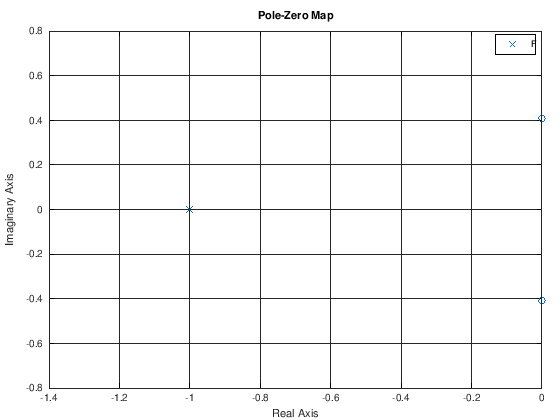

In [102]:
% Montagem da Função de Transferência  
num = [6 0 1];
den = [1 3 3 1];
F = tf(num, den)
 
% Extração dos Polos e Zeros
pzmap(F)

### **Exercício 9:** Considere a seguinte função de transferência: $$H(s) = \frac{(s+1)(s+2)}{(s+2i)(s-2i)(s+3)}$$ Obtenha seu diagrama de Polos e Zeros.


Transfer function 'F' from input 'u1' to output ...

          s^2 + 3 s + 2     
 y1:  ----------------------
      s^3 + 3 s^2 + 4 s + 12

Continuous-time model.


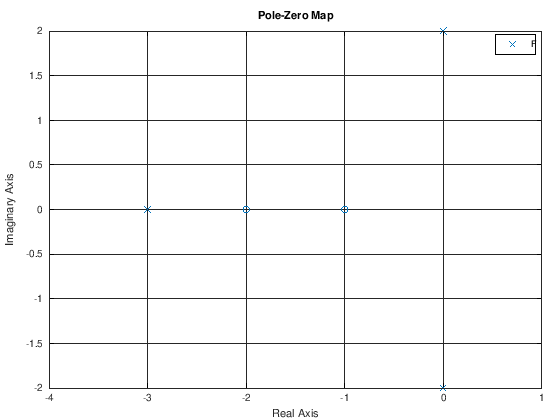

In [103]:
% Montagem da Função de Transferência  
num = conv([1 1], [1 2]);
den = conv(conv([1 2i], [1 -2i]), [1 3]);
F = tf(num, den)
 
% Extração dos Polos e Zeros
pzmap(F)

### **Exercício 10:** Encontre a equação da corrente de malha, para um circuito RLC Série
![](e1.png)

1. Aplicando Kirchoff na malhad do circuito, temos:
$$\frac{1}{C}\int{i(\tau) d\tau} + Ri(t) + L \frac{di(t)}{dt} = 0$$

2. Aplicando a transformada de Laplace na Equação Diferencial
$$\frac{1}{C}\left(\frac{I(s)}{s} + \frac{i(0)}{s} + RI(s)+ L(sI(s) - i(0)\right) = 0$$

3. Reorganizanado a Equação, temos que:
$$\left(\frac{1}{sC} + R + sL\right)I(s) = Li(0) - \frac{i(0)}{sC}$$

4. Substituindo os valores:

$$\frac{10}{s} = \left( 5s + 20 + \frac{20}{s} \right)I(s)$$

$$I(s) = \frac{10}{5s^2 + 20s + 20}$$

i = (sym)

       -2⋅s             
  2⋅s⋅ℯ    ⋅Heaviside(s)



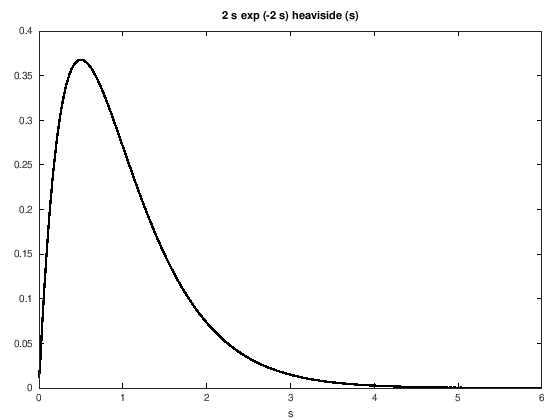

In [105]:
L = 5;
C = 0.05;
Vc = 10;
R = 10;

num = 10;
den = [5 20 20];

% Cálculo das Franções Parciais
[r, p, k] = residue(num, den);

% Montagem da Função em Franções Parciais
I = 2/(s+2)^2;

% Cálculo da Inversa de Laplace
i = ilaplace(I, s)

% Plotando a Resposta da Corrente no Tempo
plot_ilap(i, [0 6 0 0.4])
